In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

In [3]:
data = pd.read_excel('D:/Projects/Customer_Churn_Analysis/Data & Resources\Data/Prediction_data.xlsx', sheet_name = 'vw_ChurnData')

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Yashsvi Maurya\AppData\Local\Temp\ipykernel_14004\3736069.py:1: SyntaxWarning: invalid escape sequence '\D'
  data = pd.read_excel('D:/Projects/Customer_Churn_Analysis/Data & Resources\Data/Prediction_data.xlsx', sheet_name = 'vw_ChurnData')


In [4]:
data.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,11450-HAR,Male,60,Yes,Haryana,5,18,NaN,Yes,No,...,Credit Card,75.55,4707.85,0.0,0,398.79,5106.64,Stayed,Others,Others
1,11464-WES,Male,25,No,West Bengal,12,5,NaN,Yes,Yes,...,Credit Card,99.85,1992.55,0.0,0,522.06,2514.61,Stayed,Others,Others
2,11472-PUN,Female,33,No,Punjab,8,6,Deal 5,Yes,No,...,Bank Withdrawal,55.40,55.40,0.0,0,13.01,68.41,Churned,Competitor,Competitor had better devices
3,11474-TEL,Male,59,Yes,Telangana,0,18,NaN,Yes,No,...,Bank Withdrawal,75.60,661.55,0.0,0,189.99,851.54,Stayed,Others,Others
4,11510-KER,Female,46,No,Kerala,10,4,NaN,Yes,No,...,Bank Withdrawal,95.90,827.45,0.0,0,277.20,1104.65,Stayed,Others,Others


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6007 entries, 0 to 6006
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer_ID                  6007 non-null   object 
 1   Gender                       6007 non-null   object 
 2   Age                          6007 non-null   int64  
 3   Married                      6007 non-null   object 
 4   State                        6007 non-null   object 
 5   Number_of_Referrals          6007 non-null   int64  
 6   Tenure_in_Months             6007 non-null   int64  
 7   Value_Deal                   2710 non-null   object 
 8   Phone_Service                6007 non-null   object 
 9   Multiple_Lines               6007 non-null   object 
 10  Internet_Service             6007 non-null   object 
 11  Internet_Type                4784 non-null   object 
 12  Online_Security              6007 non-null   object 
 13  Online_Backup     

In [6]:
data = data.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis = 1)

In [7]:
col_to_encode = ['Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines', 'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup', 'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies', 'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing', 'Payment_Method', ]

In [8]:
label_encoders = {}
for col in col_to_encode:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])
    

In [9]:
data['Customer_Status'] = data['Customer_Status'].map({'Stayed':0, 'Churned':1})

In [10]:
x = data.drop('Customer_Status', axis = 1)
y = data['Customer_Status']

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [13]:
model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)

RandomForestClassifier()

In [15]:
y_pred = model_rf.predict(x_test)

In [16]:
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report")
print(classification_report(y_test, y_pred))

Confusion Matrix
[[789  57]
 [130 226]]

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       846
           1       0.80      0.63      0.71       356

    accuracy                           0.84      1202
   macro avg       0.83      0.78      0.80      1202
weighted avg       0.84      0.84      0.84      1202



In [19]:
importance = model_rf.feature_importances_
indices = np.argsort(importance)[::-1]

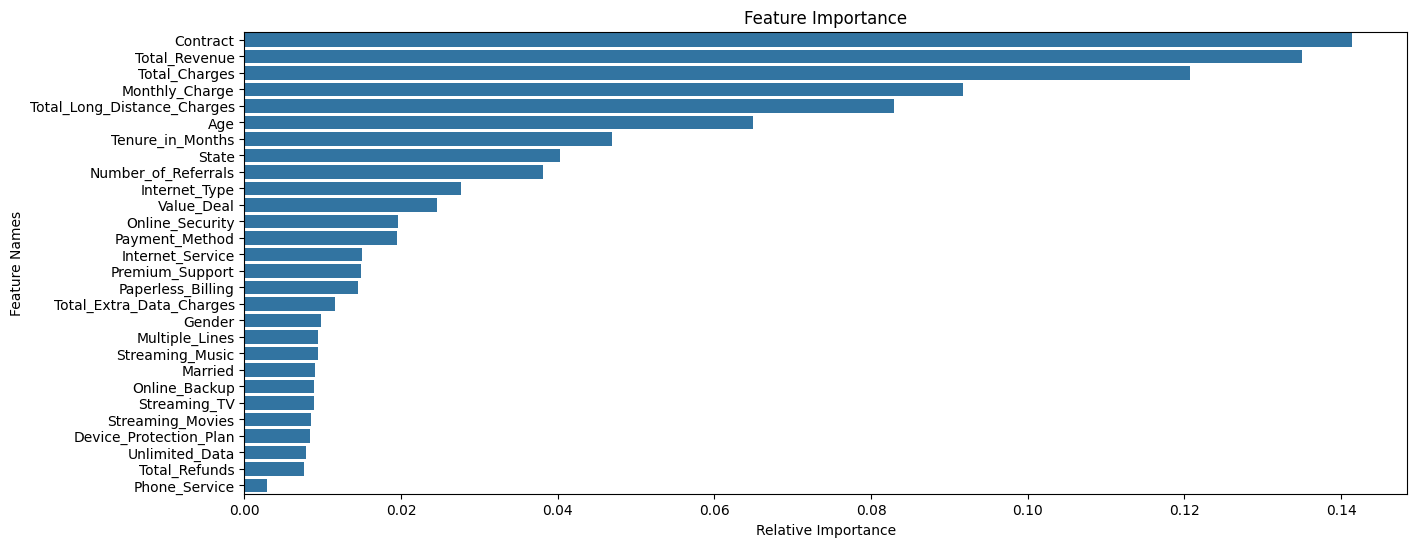

In [20]:
plt.figure(figsize = (15, 6))
sns.barplot(x = importance[indices], y = x.columns[indices])
plt.title('Feature Importance')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()

Prediction on new data

In [22]:
new_data = pd.read_excel('D:/Projects/Customer_Churn_Analysis/Data & Resources\Data/Prediction_data.xlsx', sheet_name = 'vw_JoinData')

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Yashsvi Maurya\AppData\Local\Temp\ipykernel_14004\3329767354.py:1: SyntaxWarning: invalid escape sequence '\D'
  new_data = pd.read_excel('D:/Projects/Customer_Churn_Analysis/Data & Resources\Data/Prediction_data.xlsx', sheet_name = 'vw_JoinData')


In [23]:
new_data_copy = new_data.copy()

In [24]:
customer_ids = new_data['Customer_ID']

new_data = new_data.drop(['Customer_ID', 'Customer_Status', 'Churn_Reason', 'Churn_Category'], axis = 1)

In [25]:
for col in new_data.select_dtypes(include = ['object']).columns:
    new_data[col] = label_encoders[col].transform(new_data[col])

In [26]:
new_pred = model_rf.predict(new_data)

In [27]:
new_data_copy['Customer_status_predicted'] = new_pred

In [28]:
new_data_copy = new_data_copy[new_data_copy['Customer_status_predicted'] == 1]

In [29]:
new_data_copy.to_csv('D:/Projects/Customer_Churn_Analysis/Data & Resources/Data/Churned_Customers.csv', index = False)